In [1]:
import spacy

# Load the spacy model that you have installed
nlp = spacy.load('es_core_news_md')

In [2]:
texto = ["Quizá porque mi niñez sigue jugando en tu playa", \
"Y escondido tras las cañas duerme mi primer amor", \
"Llevo tu luz y tu olor por donde quiera que vaya", \
"Y amontonado en tu arena guardo amor, juegos y penas",\
"Yo que en la piel tengo el sabor amargo del llanto eterno", \
"Que han vertido en ti cien pueblos, de Algeciras a Estambul", \
"Para que pintes de azul sus largas noches de invierno", \
"A fuerza de desventuras tu alma es profunda y oscura", \
"A tus atardeceres rojos se acostumbraron mis ojos", \
"Como el recodo al camino", \
"Soy cantor, soy embustero", \
"Me gusta el juego y el vino, tengo alma de marinero", \
"¿Qué le voy a hacer si yo nací en el Mediterráneo?", \
"Nací en el Mediterráneo"]


In [3]:
def spacy_tokenizer_esp(documento):
    resultado = []
    procesado = nlp(documento)
    for token in procesado: 
        if (token.is_stop == False and token.is_punct == False and token.lemma_.strip()!=''):
            resultado.append(token.lemma_)
    return resultado


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(input = 'content', tokenizer = spacy_tokenizer_esp)
procesado = tfidf_vectorizer.fit_transform(texto)
procesado

<14x52 sparse matrix of type '<class 'numpy.float64'>'
	with 63 stored elements in Compressed Sparse Row format>

In [5]:
import pandas as pd

denso = procesado.todense()
denso = denso.tolist()
tfidf_denso = pd.DataFrame(
    denso,columns=tfidf_vectorizer.get_feature_names())

tfidf_denso

,a,acostumbrar,algeciras,alma,amargo,amontonar,amor,arena,atardecer,azul,...,playa,profundo,pueblo,querer,recodo,rojo,sabor,verter,vino,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.424705,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.311890
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.476515,0.000000,0.000000,0.000000,0.000000,0.00000,0.302876
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.368477,0.318922,0.368477,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.468413
4,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,0.000000,0.00000,0.000000
5,0.297228,0.000000,0.427003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.427003,0.000000,0.000000,0.000000,0.000000,0.427003,0.00000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.447214,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
7,0.293164,0.000000,0.000000,0.364523,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.421164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.267695
8,0.328701,0.472217,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.472217,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.472217,0.000000,0.000000,0.00000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.00000,0.000000


In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
X_lsa = svd.fit_transform(tfidf_denso)
X_lsa

array([[ 6.07713628e-05,  3.73802709e-05],
       [ 5.06949462e-02,  5.81201925e-01],
       [ 4.14324797e-02,  4.32273342e-01],
       [ 6.25593911e-02,  6.59611686e-01],
       [ 7.05300739e-05,  4.33828229e-05],
       [ 1.98832626e-01,  6.42675601e-02],
       [ 8.51513378e-05,  5.23763156e-05],
       [ 2.26367750e-01,  5.06639415e-01],
       [ 2.15619593e-01,  6.88830134e-02],
       [-5.88243150e-05, -3.61826481e-05],
       [ 9.24037595e-05,  5.68372570e-05],
       [ 7.04447798e-02,  5.21980214e-01],
       [ 9.67572682e-01, -1.09954831e-01],
       [ 9.13371902e-01, -1.76640434e-01]])

In [9]:
df_graficar = pd.DataFrame(X_lsa,columns = ['d1','d2']) 
df_graficar["num_frase"] = range(14)
df_graficar

,d1,d2,num_frase
0,0.000061,0.000037,0
1,0.050695,0.581202,1
2,0.041432,0.432273,2
3,0.062559,0.659612,3
4,0.000071,0.000043,4
5,0.198833,0.064268,5
6,0.000085,0.000052,6
7,0.226368,0.506639,7
8,0.215620,0.068883,8
9,-0.000059,-0.000036,9


<AxesSubplot:xlabel='d1', ylabel='d2'>

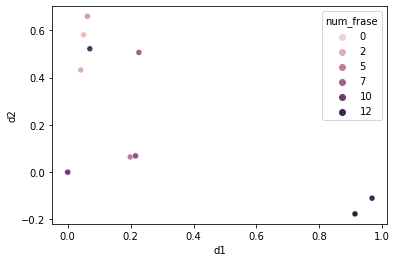

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=df_graficar, x='d1',y='d2',hue = 'num_frase')

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_denso)

X_pca

array([[-0.10654135, -0.31902143],
       [-0.29576635,  0.4130451 ],
       [-0.24266354,  0.23120292],
       [-0.32203493,  0.47578143],
       [-0.10654135, -0.31902143],
       [ 0.04600627, -0.22692683],
       [-0.10654135, -0.31902143],
       [-0.11843997,  0.25932188],
       [ 0.05962967, -0.21382869],
       [-0.10654135, -0.31902143],
       [-0.10654135, -0.31902143],
       [-0.25456552,  0.30386197],
       [ 0.83005228,  0.16303698],
       [ 0.83048883,  0.18961239]])

In [12]:
df_graficar = pd.DataFrame(X_pca,columns = ['d1','d2']) 
df_graficar["num_frase"] = range(14)
df_graficar

,d1,d2,num_frase
0,-0.106541,-0.319021,0
1,-0.295766,0.413045,1
2,-0.242664,0.231203,2
3,-0.322035,0.475781,3
4,-0.106541,-0.319021,4
5,0.046006,-0.226927,5
6,-0.106541,-0.319021,6
7,-0.118440,0.259322,7
8,0.059630,-0.213829,8
9,-0.106541,-0.319021,9


<AxesSubplot:xlabel='d1', ylabel='d2'>

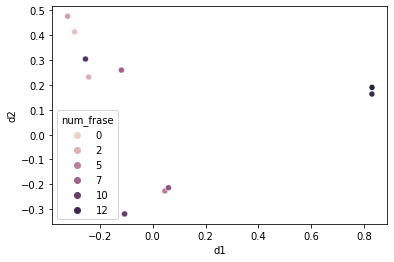

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data=df_graficar, x='d1',y='d2',hue = 'num_frase')